In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [4]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

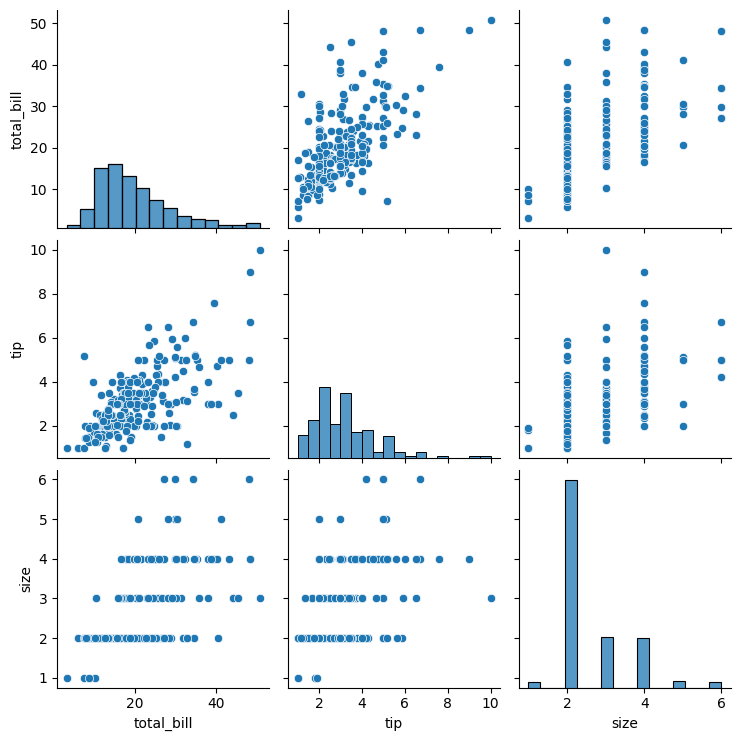

In [6]:
#paraplot        #numerical value only how they depentent
sns.pairplot(df)
#hue='sex' use for categotical data

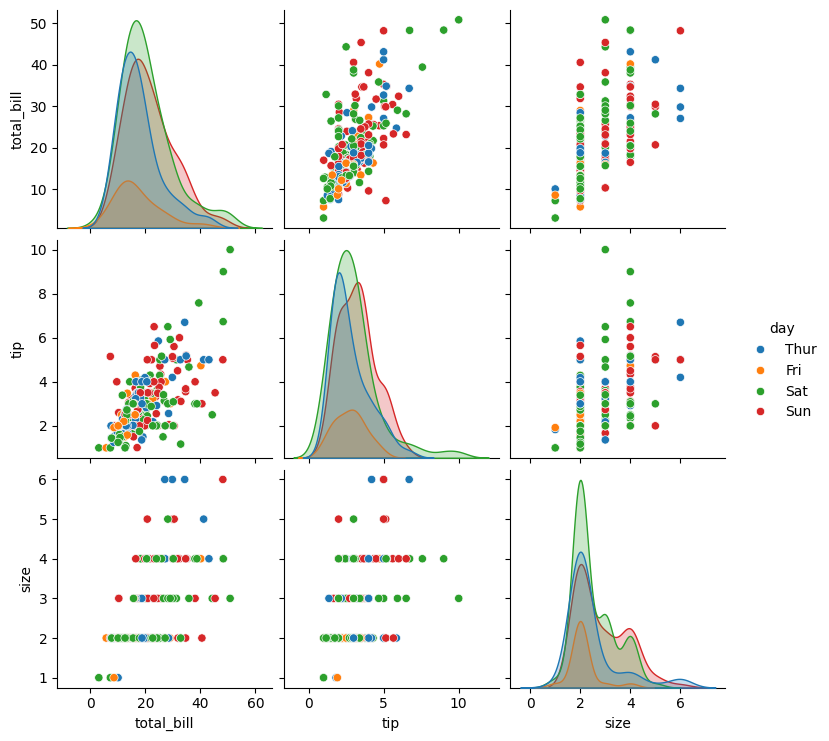

In [7]:
sns.pairplot(data=df,hue='day')

In [8]:
totalbil=df.groupby('sex')['sex'].count()
totalbil

sex
Male      157
Female     87
Name: sex, dtype: int64

In [9]:
#all numercial

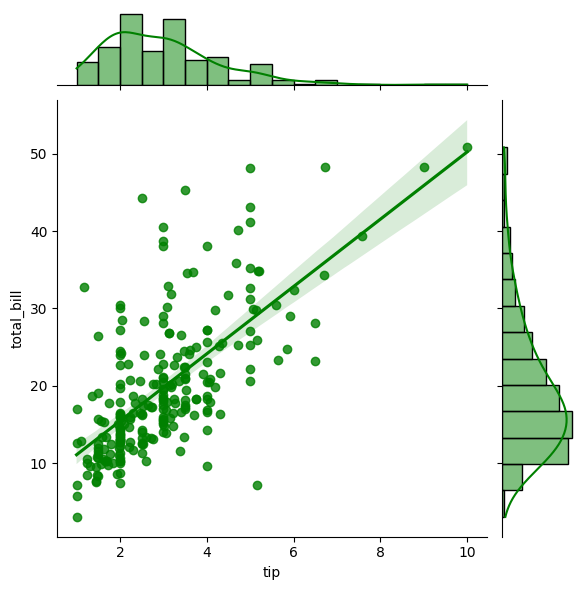

In [10]:
#jointplot==========>>>>>similar scatterplot
sns.jointplot(x='tip',y='total_bill',data=df,color='green',kind='reg')#only numerical   7

In [11]:
df['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

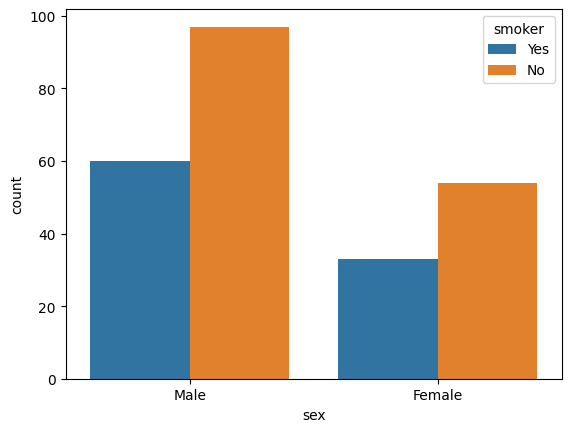

In [30]:
#count plott

#each count
#each country count
sns.countplot(x=df['sex'],data=df,hue='smoker')

<Axes: xlabel='total_bill', ylabel='day'>

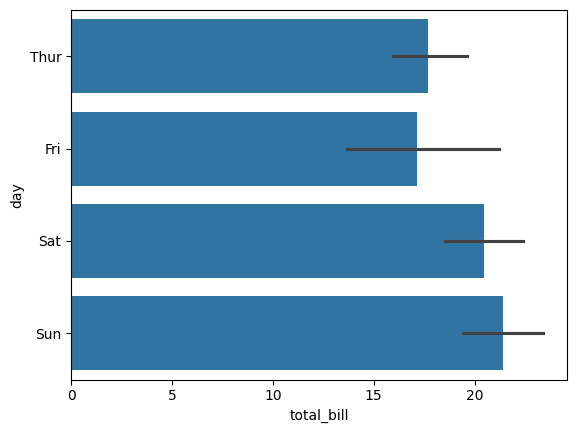

In [36]:
#bar plot
sns.barplot(x='total_bill',y='day',data=df)

In [13]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<Axes: xlabel='day', ylabel='count'>

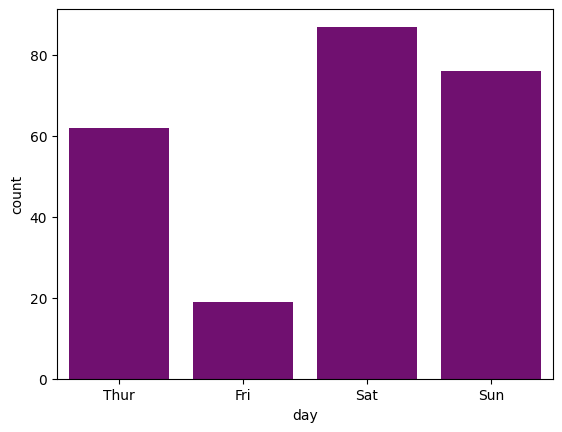

In [28]:
sns.countplot(x='day',data=df,color='purple')

In [14]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<Axes: xlabel='smoker', ylabel='total_bill'>

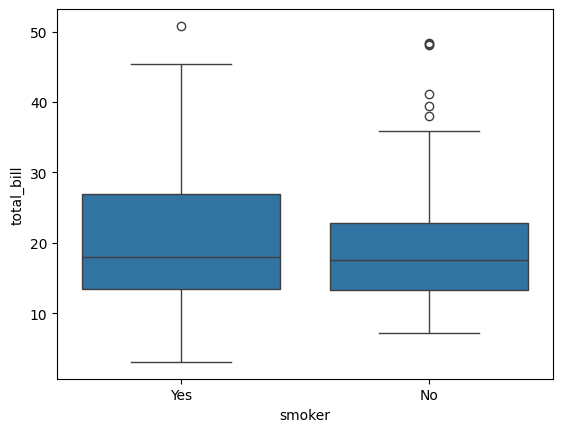

In [37]:
sns.boxplot(x='smoker',y='total_bill',data=df)
#q1=25 percentile q1
#q2 = 50 percentile q2
#q3 = 75 percentile q3

#outliers
#wrog

#3,5,7,1,1,8,4,6
#1,1,3,4,  5,6,7,8  meadin=4+5/2=4.5   q2

#1,1,3,4    =mean =1+3=4/2=2  q1== 2   25 per


In [15]:
df.corr() #CORE

<ipython-input-15-52582d15afea>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() #CORE


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<ipython-input-16-3329c24c167b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linecolor='red')


<Axes: >

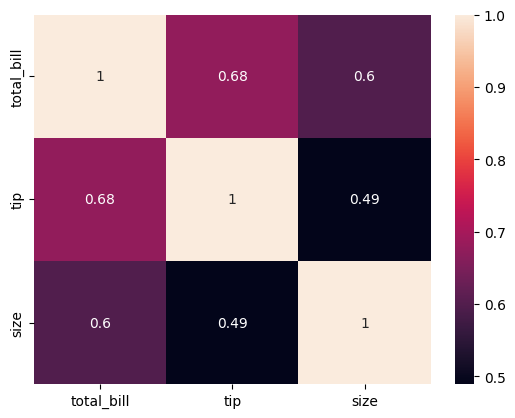

In [16]:
sns.heatmap(df.corr(),annot=True,linecolor='red')

#Encoding

In [17]:
df1=pd.get_dummies(df[['sex','smoker','day','time']],drop_first=True)
df1

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1
...,...,...,...,...,...,...
239,0,1,0,1,0,1
240,1,0,0,1,0,1
241,0,0,0,1,0,1
242,0,1,0,1,0,1


#Concate

In [18]:
df1=pd.concat([df,df1],axis=True)
df1

,total_bill,tip,sex,smoker,day,time,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,0,0,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,0,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,0,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,0,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,1,0,1,0,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1,0,0,1,0,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,0,1,0,1
242,17.82,1.75,Male,No,Sat,Dinner,2,0,1,0,1,0,1


#drop columns

In [19]:
out=df1.drop(['sex','smoker','day','time'],axis=1)
out

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [20]:
x=out.drop(['tip'],axis=1)
x

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...
239,29.03,3,0,1,0,1,0,1
240,27.18,2,1,0,0,1,0,1
241,22.67,2,0,0,0,1,0,1
242,17.82,2,0,1,0,1,0,1


In [21]:
y=df1['tip']
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
234,15.53,2,0,0,0,1,0,1
227,20.45,4,0,1,0,1,0,1
180,34.65,4,0,0,0,0,1,1
5,25.29,4,0,1,0,0,1,1
56,38.01,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
106,20.49,2,0,0,0,1,0,1
14,14.83,2,1,1,0,0,1,1
92,5.75,2,1,0,1,0,0,1
179,34.63,2,0,0,0,0,1,1


In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([3.0062459 , 1.88433635, 3.95104596, 3.83538235, 2.04894087,
       2.46184844, 3.60902453, 2.30041089, 2.4636599 , 2.3463007 ,
       2.80200027, 2.13388682, 2.12401121, 2.1331474 , 1.7952912 ,
       3.16700534, 2.94392994, 3.11913412, 2.609629  , 5.95806896,
       3.56396028, 3.35906423, 2.10175288, 2.01628703, 2.9530325 ,
       2.2960318 , 2.02892625, 3.15918704, 3.17411621, 6.77347879,
       4.98147104, 1.5402207 , 3.35811926, 2.74995622, 2.87580148,
       3.96419663, 2.09515484, 5.49696602, 2.36595831, 2.9793722 ,
       2.10882457, 2.49705316, 3.34758617, 2.23575017, 1.86430637,
       0.74548063, 1.74316992, 3.17013342, 1.8979276 , 2.37583392,
       3.13360143, 3.56515218, 4.64122176, 2.70955892, 2.91767219,
       2.42519878, 1.43622406, 2.81345936, 2.97552712, 2.5793591 ,
       4.66297061, 2.63576328, 2.98622782, 2.61620236, 3.04576714,
       3.04050691, 2.24099976, 1.44999901, 3.63004572, 3.67534225,
       3.49028613, 4.32604305, 2.8358341 , 2.91808746])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error
print('absolut error',mean_absolute_error(y_pred,y_test))

absolut error 0.7171821289867398


In [25]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
print('mean absolute percentage',mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage 0.27632499157646107
